In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Lasso

from sklearn.model_selection import train_test_split

In [2]:
cardata = pd.read_csv("F:\MachineLearningProjects\car data.csv") 

In [3]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
cardata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
cardata.shape

(301, 9)

In [6]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
cardata.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
cardata.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
cardata.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

Encoding the cat data

In [12]:
# Encoding fuel type col
cardata.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [13]:
# Encoding Seller type col
cardata.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [14]:
# Encoding Transmission type col
cardata.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [17]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Spliting

In [19]:
X = cardata.drop(columns = ['Car_Name','Selling_Price'],axis=1)

In [20]:
y = cardata['Selling_Price']

In [21]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Train and Test split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [24]:
LRmodel = LinearRegression()

In [25]:
LRmodel.fit(X_train,y_train)

LinearRegression()

In [26]:
trainpred = LRmodel.predict(X_train)

In [29]:
print('R2_Score for train data:',r2_score(y_train,trainpred))
print('Mean abs error for train data:',mean_absolute_error(y_train,trainpred))

R2_Score for train data: 0.888658825760647
Mean abs error for train data: 1.1860297412061234


Text(0.5, 1.0, 'Actual vs Predict Prices')

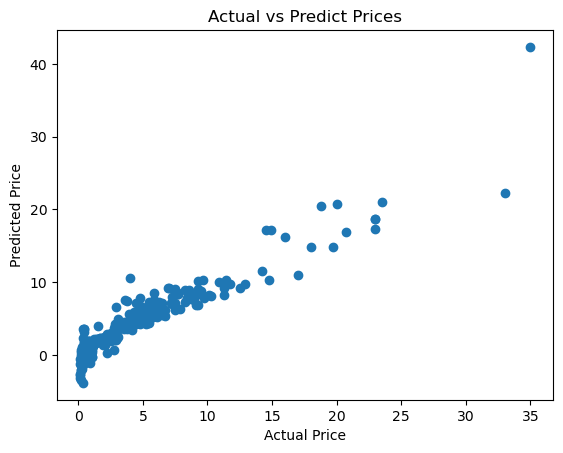

In [34]:
plt.scatter(y_train,trainpred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predict Prices')

In [32]:
testpred = LRmodel.predict(X_test)

In [33]:
print('R2_Score for test data:',r2_score(y_test,testpred))
print('Mean abs error for test data:',mean_absolute_error(y_test,testpred))

R2_Score for test data: 0.39311067657253373
Mean abs error for test data: 1.3022401086317952


Text(0.5, 1.0, 'Actual vs Predict Prices')

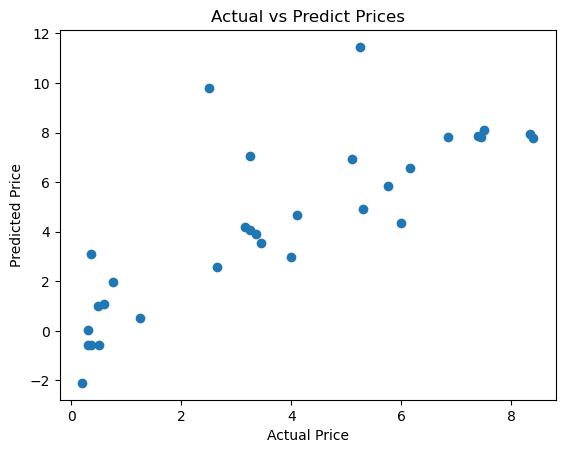

In [35]:
plt.scatter(y_test,testpred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predict Prices')

In [37]:
LSmodel = Lasso()

In [38]:
LSmodel.fit(X_train,y_train)

Lasso()

In [39]:
testpred = LSmodel.predict(X_test)

In [41]:
print('R2_Score for test data:',r2_score(y_test,testpred))
print('Mean abs error for test data:',mean_absolute_error(y_test,testpred))

R2_Score for test data: 0.46123204958260644
Mean abs error for test data: 1.1492010997712798


Text(0.5, 1.0, 'Actual vs Predict Prices')

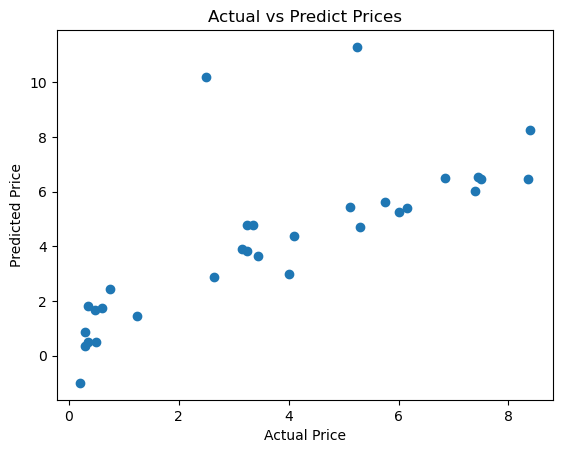

In [40]:
plt.scatter(y_test,testpred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predict Prices')